# Python Libraries

In [29]:
import pandas as pd
import numpy as np

# Load the Dataset

In [30]:
data = pd.read_csv('01 Call-Center-Dataset.csv')
df = pd.DataFrame(data)
df

,Call Id,Agent,Date,Time,Topic,Answered (Y/N),Resolved,Speed of answer in seconds,AvgTalkDuration,Satisfaction rating
0,ID0001,Diane,2021-01-01,9:12:58,Contract related,Y,Y,109.0,0:02:23,3.0
1,ID0002,Becky,2021-01-01,9:12:58,Technical Support,Y,N,70.0,0:04:02,3.0
2,ID0003,Stewart,2021-01-01,9:47:31,Contract related,Y,Y,10.0,0:02:11,3.0
3,ID0004,Greg,2021-01-01,9:47:31,Contract related,Y,Y,53.0,0:00:37,2.0
4,ID0005,Becky,2021-01-01,10:00:29,Payment related,Y,Y,95.0,0:01:00,3.0
...,...,...,...,...,...,...,...,...,...,...
4995,ID4996,Jim,2021-03-31,16:37:55,Payment related,Y,Y,22.0,0:05:40,1.0
4996,ID4997,Diane,2021-03-31,16:45:07,Payment related,Y,Y,100.0,0:03:16,3.0
4997,ID4998,Diane,2021-03-31,16:53:46,Payment related,Y,Y,84.0,0:01:49,4.0
4998,ID4999,Jim,2021-03-31,17:02:24,Streaming,Y,Y,98.0,0:00:58,5.0


# Data Cleaning

In [33]:
df.isnull().sum()

Call Id                         0
Agent                           0
Date                            0
Time                            0
Topic                           0
Answered (Y/N)                  0
Resolved                        0
Speed of answer in seconds    946
AvgTalkDuration               946
Satisfaction rating           946
dtype: int64

In [34]:
df['Speed of answer in seconds'] =  pd.to_numeric(df['Speed of answer in seconds'], errors='coerce')
df['Satisfaction rating'] = pd.to_numeric(df['Satisfaction rating'], errors='coerce')
df['AvgTalkDuration'] = pd.to_timedelta(df['AvgTalkDuration'], errors='coerce').dt.total_seconds()

In [8]:
df

,Call Id,Agent,Date,Time,Topic,Answered (Y/N),Resolved,Speed of answer in seconds,AvgTalkDuration,Satisfaction rating
0,ID0001,Diane,2021-01-01,9:12:58,Contract related,Y,Y,109.0,143.0,3.0
1,ID0002,Becky,2021-01-01,9:12:58,Technical Support,Y,N,70.0,242.0,3.0
2,ID0003,Stewart,2021-01-01,9:47:31,Contract related,Y,Y,10.0,131.0,3.0
3,ID0004,Greg,2021-01-01,9:47:31,Contract related,Y,Y,53.0,37.0,2.0
4,ID0005,Becky,2021-01-01,10:00:29,Payment related,Y,Y,95.0,60.0,3.0
...,...,...,...,...,...,...,...,...,...,...
4995,ID4996,Jim,2021-03-31,16:37:55,Payment related,Y,Y,22.0,340.0,1.0
4996,ID4997,Diane,2021-03-31,16:45:07,Payment related,Y,Y,100.0,196.0,3.0
4997,ID4998,Diane,2021-03-31,16:53:46,Payment related,Y,Y,84.0,109.0,4.0
4998,ID4999,Jim,2021-03-31,17:02:24,Streaming,Y,Y,98.0,58.0,5.0


# Data Exploration (EDA)

In [32]:
df.describe()

,Speed of answer in seconds,Satisfaction rating
count,4054.000000,4054.000000
mean,67.520720,3.403552
std,33.592872,1.212220
min,10.000000,1.000000
25%,39.000000,3.000000
50%,68.000000,3.000000
75%,97.000000,4.000000
max,125.000000,5.000000


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Call Id                     5000 non-null   object 
 1   Agent                       5000 non-null   object 
 2   Date                        5000 non-null   object 
 3   Time                        5000 non-null   object 
 4   Topic                       5000 non-null   object 
 5   Answered (Y/N)              5000 non-null   object 
 6   Resolved                    5000 non-null   object 
 7   Speed of answer in seconds  4054 non-null   float64
 8   AvgTalkDuration             4054 non-null   object 
 9   Satisfaction rating         4054 non-null   float64
dtypes: float64(2), object(8)
memory usage: 390.8+ KB


# 1. Agent wise Analysis

In [10]:
agent_per = df.groupby('Agent').agg({'Speed of answer in seconds' : 'mean', 'AvgTalkDuration': 'mean', 'Satisfaction rating': 'mean', 'Resolved': lambda x: (x == 'Y').mean()}).reset_index()
agent_per

,Agent,Speed of answer in seconds,AvgTalkDuration,Satisfaction rating,Resolved
0,Becky,65.330754,220.009671,3.371373,0.732171
1,Dan,67.282983,231.189293,3.447419,0.744076
2,Diane,66.267465,218.954092,3.405190,0.714060
3,Greg,68.444223,226.802789,3.404382,0.729167
4,Jim,66.343284,228.113806,3.393657,0.728228
5,Joe,70.987603,224.101240,3.330579,0.735245
6,Martha,69.488327,223.725681,3.470817,0.722571
7,Stewart,66.184486,226.205451,3.400419,0.728522


# 2. Topic-wise Analysis
Number of calls per topic

Average satisfaction per topic

Resolution rate per topic 

In [12]:
topic_wise = df.groupby('Topic').agg({'Call Id': 'count', 'Satisfaction rating': 'mean', 'Resolved': lambda x : (x == 'Y').mean()}).reset_index()
topic_wise

,Topic,Call Id,Satisfaction rating,Resolved
0,Admin Support,976,3.426415,0.740779
1,Contract related,976,3.377693,0.726434
2,Payment related,1007,3.396088,0.723932
3,Streaming,1022,3.402597,0.732877
4,Technical Support,1019,3.414907,0.722277


# 3. Time-based Analysis
Number of calls per hour/time slot

Peak call hours

Duration trends throughout the day


In [14]:
df['Hours'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour

call_by_hour = df.groupby('Hours')['Call Id'].count().reset_index().rename(columns={'Call Id': 'Total Calls'})
print(call_by_hour)

peak_hour = call_by_hour.sort_values(by = 'Total Calls', ascending = False)
print(peak_hour)

   Hours  Total Calls
0      9          547
1     10          529
2     11          590
3     12          547
4     13          594
5     14          499
6     15          531
7     16          566
8     17          583
9     18           14
   Hours  Total Calls
4     13          594
2     11          590
8     17          583
7     16          566
0      9          547
3     12          547
6     15          531
1     10          529
5     14          499
9     18           14


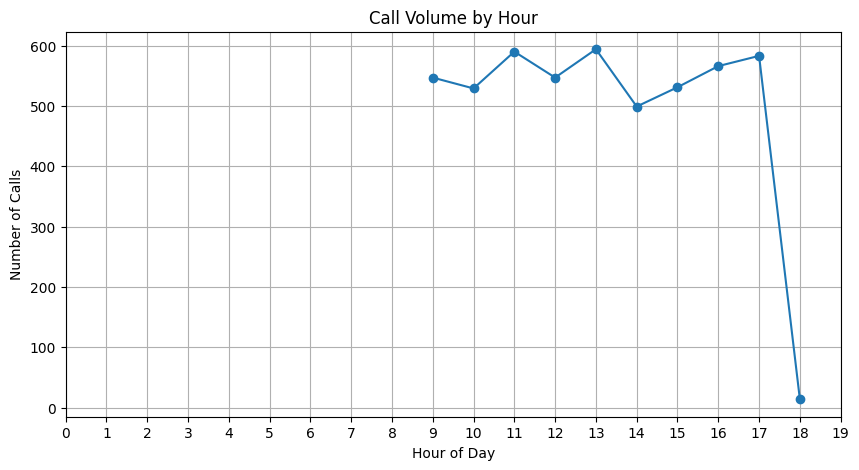

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(call_by_hour['Hours'], call_by_hour['Total Calls'], marker='o')
plt.title('Call Volume by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Calls')
plt.grid(True)
plt.xticks(range(20))
plt.show()

In [24]:
avg_dur_by_hour = df.groupby('Hours')['AvgTalkDuration'].mean().reset_index()
avg_dur_by_hour

,Hours,AvgTalkDuration
0,9,221.263761
1,10,231.055556
2,11,221.806653
3,12,229.429234
4,13,217.555785
5,14,227.625616
6,15,221.356322
7,16,229.480519
8,17,224.151579
9,18,290.166667


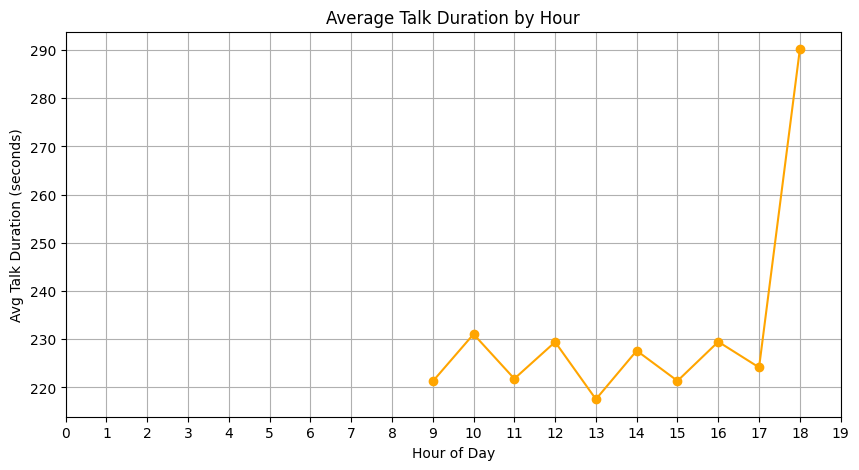

In [30]:
plt.figure(figsize=(10, 5))
plt.plot(avg_dur_by_hour['Hours'], avg_dur_by_hour['AvgTalkDuration'], marker='o', color='orange')
plt.title('Average Talk Duration by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Avg Talk Duration (seconds)')
plt.grid(True)
plt.xticks(range(20))
plt.show()

4. Answered & Resolved Analysis
% of calls answered vs. not answered

% of calls resolved vs. not resolved

Correlation between Answered, Resolved, and Satisfaction

In [33]:
answered_rate = (df['Answered (Y/N)'] == 'Y').mean()
resolved_rate = (df['Resolved'] == 'Y').mean()

print(f"Answered Rate: {answered_rate:.2%}")
print(f"Resolved Rate: {resolved_rate:.2%}")

Answered Rate: 81.08%
Resolved Rate: 72.92%


# Correlation between Answered, Resolved, and Satisfaction


In [11]:
df['Answered_num'] = df['Answered (Y/N)'].map({'Y': 1, 'N': 0})
df['Resolved_num'] = df['Resolved'].map({'Y': 1, 'N': 0})

correlation_matrix = df[['Answered_num', 'Resolved_num', 'Satisfaction rating']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                     Answered_num  Resolved_num  Satisfaction rating
Answered_num             1.000000      0.792689                  NaN
Resolved_num             0.792689      1.000000            -0.007002
Satisfaction rating           NaN     -0.007002             1.000000


In [20]:
answered_counts = df['Answered (Y/N)'].value_counts(normalize=True) * 100
resolved_counts = df['Resolved'].value_counts(normalize=True) * 100

In [22]:
resolved_counts

Resolved
Y    72.92
N    27.08
Name: proportion, dtype: float64

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25064\2718121126.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=answered_counts.index, y=answered_counts.values, palette='Blues')


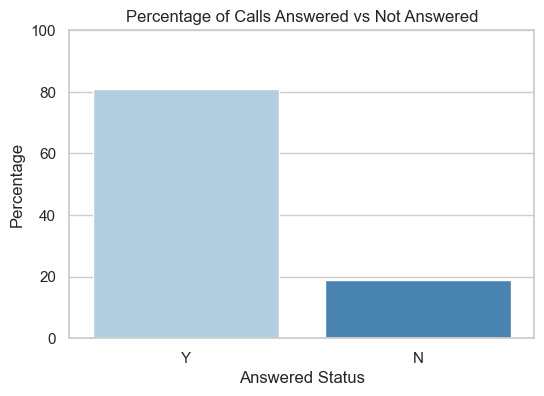

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

plt.figure(figsize=(6, 4))
sns.barplot(x=answered_counts.index, y=answered_counts.values, palette='Blues')
plt.title('Percentage of Calls Answered vs Not Answered')
plt.ylabel('Percentage')
plt.xlabel('Answered Status')
plt.ylim(0, 100)
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25064\3270583287.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=resolved_counts.index, y=resolved_counts.values, palette='Blues')


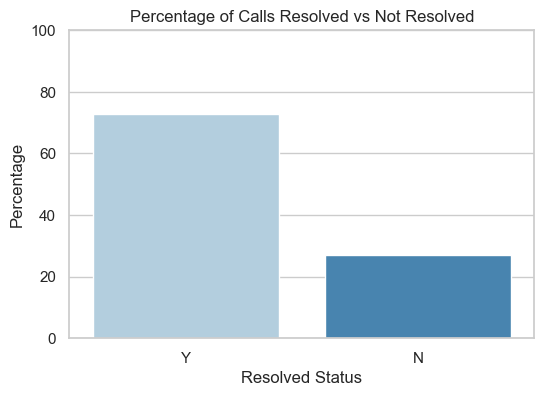

In [23]:
sns.set(style='whitegrid')

plt.figure(figsize=(6, 4))
sns.barplot(x=resolved_counts.index, y=resolved_counts.values, palette='Blues')
plt.title('Percentage of Calls Resolved vs Not Resolved')
plt.ylabel('Percentage')
plt.xlabel('Resolved Status')
plt.ylim(0, 100)
plt.show()

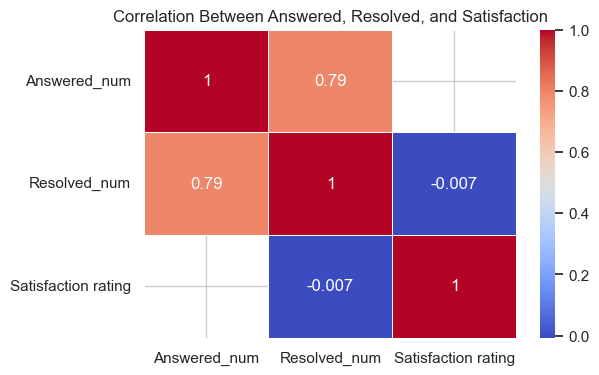

In [24]:
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Answered, Resolved, and Satisfaction')
plt.show()

#  Correlation: Talk time, Answered, Resolved vs. Satisfaction

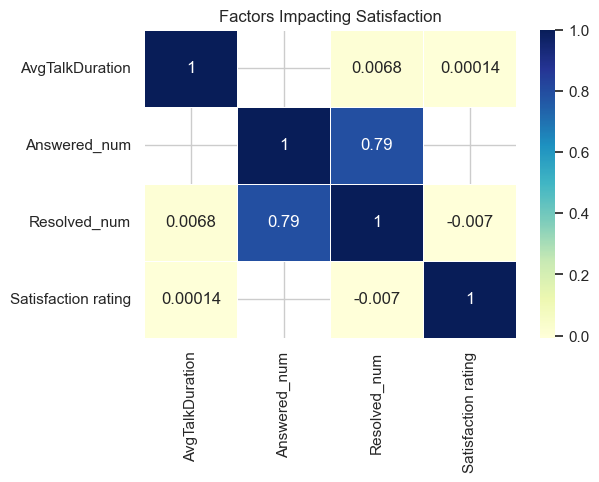

In [25]:
corr_fact = df[['AvgTalkDuration','Answered_num', 'Resolved_num', 'Satisfaction rating']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr_fact, annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title('Factors Impacting Satisfaction')
plt.show()

#  Satisfaction by Agent

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25064\4171288222.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=agent_sat.index, y=agent_sat.values, palette='coolwarm')


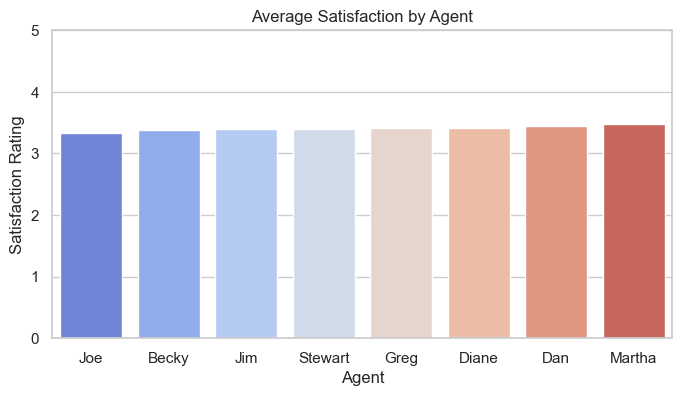

In [28]:
agent_sat = df.groupby('Agent')['Satisfaction rating'].mean().sort_values()

plt.figure(figsize=(8, 4))
sns.barplot(x=agent_sat.index, y=agent_sat.values, palette='coolwarm')
plt.title('Average Satisfaction by Agent')
plt.ylabel('Satisfaction Rating')
plt.xlabel('Agent')
plt.ylim(0, 5)
plt.show()

# Satisfaction by Topic

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25064\2476541345.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = sat_topic.index, y = sat_topic.values, palette='Set2')


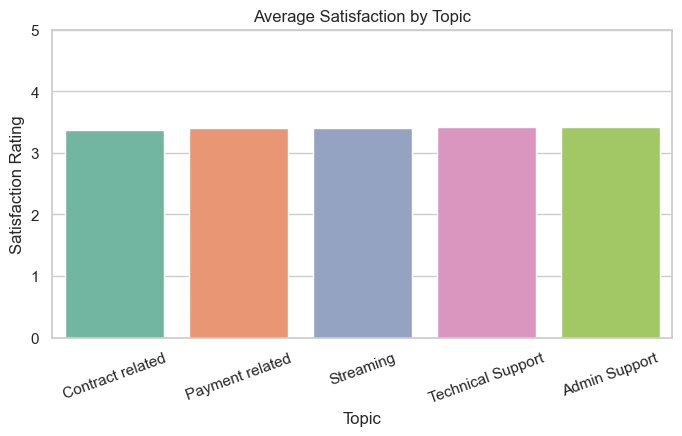

In [39]:
sat_topic = df.groupby('Topic')['Satisfaction rating'].mean().sort_values()

plt.figure(figsize=(8, 4))
sns.barplot(x = sat_topic.index, y = sat_topic.values, palette='Set2')
plt.title('Average Satisfaction by Topic')
plt.xlabel('Topic')
plt.ylabel('Satisfaction Rating')
plt.xticks(rotation=20)
plt.ylim(0, 5)
plt.show()

# Satisfaction vs Resolved Status

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25064\3325190222.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Resolved', y = 'Satisfaction rating', data = df, palette='Pastel1')


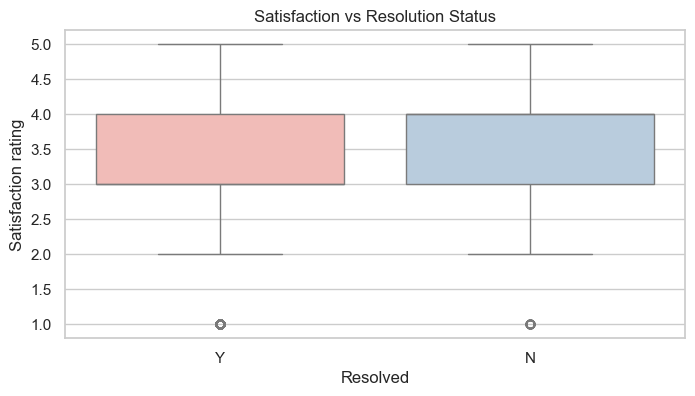

In [40]:
plt.figure(figsize=((8, 4)))
sns.boxplot(x = 'Resolved', y = 'Satisfaction rating', data = df, palette='Pastel1')
plt.title('Satisfaction vs Resolution Status')
plt.show()